# Trabalho de Ciência de Dados

### Grupo: 5    |       Alunos:

*   Anne Sanflorian Pretyman
*   Hevans Vinícius Pereira
*   Leonardo Gonçalves de Moraes
*   Renata Sarmet Smiderle Mendes


# Importação de bibliotecas necessárias

In [2]:
# import sys  
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install pywaffle

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pywaffle import Waffle

# from google.colab import drive
# drive.mount('/content/gdrive')

# Obtenção dos dados

Os dados foram obtidos (COLOCAR FONTE) ... data da coleta 14/05/2021 ..... **#ToDo: descrever um pouco sobre a coleta do dado**

In [4]:
# df = pd.read_csv('/content/gdrive/Shareddrives/Time Ciência de Dados/Projeto/datasets/vacinacao_covid_estabelecimentos_modificado.csv', sep=';', error_bad_lines=False)
df = pd.read_csv('datasets/vacinacao_covid_estabelecimentos_modificado.csv', sep=';', error_bad_lines=False)

In [5]:
df.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_nmmunicipio,paciente_endereco_uf,estalecimento_nofantasia,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_nome
0,67.0,F,BRANCA,355645.0,VARGEM GRANDE PAULISTA,SP,UBS ROQUE LINO DE CARVALHO,VARGEM GRANDE PAULISTA,SP,Pessoas de 65 a 69 anos,Faixa Etária,ASTRAZENECA/OXFORD,2021-04-20,1ª Dose,Vacina Covid-19 - Covishield
1,82.0,M,BRANCA,354340.0,RIBEIRAO PRETO,SP,UBS DR WALDEMAR BARNSLEY PESSOA PARQUE RIBEIRAO,RIBEIRAO PRETO,SP,Pessoas de 80 anos ou mais,Faixa Etária,ASTRAZENECA/OXFORD,2021-03-02,1ª Dose,Vacina Covid-19 - Covishield
2,35.0,F,SEM INFORMACAO,355030.0,SAO PAULO,SP,UBS JOSE DE BARROS MAGALDI,SAO PAULO,SP,Outros,Trabalhadores de Saúde,SINOVAC,2021-01-28,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
3,72.0,M,BRANCA,353930.0,PIRASSUNUNGA,SP,USF ANA PAULA FERRARI PIRASSUNUNGA,PIRASSUNUNGA,SP,Pessoas de 70 a 74 anos,Faixa Etária,SINOVAC,2021-04-10,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,71.0,M,BRANCA,353580.0,PARANAPANEMA,SP,UNIDADE DE SAUDE DA FAMILIA SALVADOR RIBEIRO L...,PARANAPANEMA,SP,Pessoas de 70 a 74 anos,Faixa Etária,SINOVAC,2021-03-24,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11567410 entries, 0 to 11567409
Data columns (total 15 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   paciente_idade                     float64
 1   paciente_enumsexobiologico         object 
 2   paciente_racacor_valor             object 
 3   paciente_endereco_coibgemunicipio  float64
 4   paciente_endereco_nmmunicipio      object 
 5   paciente_endereco_uf               object 
 6   estalecimento_nofantasia           object 
 7   estabelecimento_municipio_nome     object 
 8   estabelecimento_uf                 object 
 9   vacina_grupoatendimento_nome       object 
 10  vacina_categoria_nome              object 
 11  vacina_fabricante_nome             object 
 12  vacina_dataaplicacao               object 
 13  vacina_descricao_dose              object 
 14  vacina_nome                        object 
dtypes: float64(2), object(13)
memory usage: 1.3+ GB


### Qual o tamanho do DataFrame?

In [7]:
print('Número de entradas/pacientes:\t {}'.format(df.shape[0]))
print('Número de variáveis/atributos:\t {}'.format(df.shape[1]))

Número de entradas/pacientes:	 11567410
Número de variáveis/atributos:	 15


#### Cada linha da tabela representa um registro de um paciente. Temos 15 variáveis:

*   **paciente_idade**: Float, representando a idade do paciente;
*   **paciente_enumsexobiologico**: Objeto string, representando o sexo biológico do paciente (M=masculino, F=feminino, I=indefinido);
*   **paciente_racacor_valor**: Objeto string, descrevendo a raça/cor do paciente; 
*   **paciente_endereco_coibgemunicipio**: Float, representando o código do município do paciente segundo o IBGE;
*   **paciente_endereco_nmmunicipio**: Objeto string, descrevendo o nome do município do paciente segundo o IBGE;
*   **paciente_endereco_uf**: Objeto string, descrevendo o nome do estado do paciente segundo o IBGE;
*   **estalecimento_nofantasia**: Objeto string, descrevendo o nome do estabelecimento no qual o paciente foi vacinado;
*   **estabelecimento_municipio_nome**: Objeto string, descrevendo o nome do município do estabelecimento no qual o paciente foi vacinado;
*   **estabelecimento_uf**: Objeto string, descrevendo o nome do estado do estabelecimento no qual o paciente foi vacinado;
*   **vacina_grupoatendimento_nome**: Objeto string, descrevendo o grupo de atendimento em que o paciente se enquadrou para a vacinação;
*   **vacina_categoria_nome**: Objeto string, descrevendo a categoria em que o paciente se enquadrou para a vacinação;
*   **vacina_fabricante_nome**: Objeto string, descrevendo o nome do fabricante da vacina que o paciente tomou;
*   **vacina_dataaplicacao**: Objeto string, indicando a data em que o paciente foi vacinado;
*   **vacina_descricao_dose**: Objeto string, indicando a dose correspondente que o paciente tomou;
*   **vacina_nome**: Objeto string, descrevendo o nome da vacina que o paciente tomou;

#### A feature *paciente_endereco_coibgemunicipio* e a *paciente_endereco_nmmunicipio* representam a mesma informação. Para confirmar isso, podemos checar a correlação delas.

In [8]:
df[['paciente_endereco_coibgemunicipio', 'paciente_endereco_nmmunicipio']].corr()

,paciente_endereco_coibgemunicipio
paciente_endereco_coibgemunicipio,1.0


#### Como a correlação é 1, comprovamos que de fato elas indicam a mesma informação, portanto vamos retirar a variável correspondente ao código do município. Logo, continuaremos com 14 variáveis.

In [9]:
df.drop('paciente_endereco_coibgemunicipio', axis=1, inplace=True)

In [10]:
df.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,paciente_endereco_nmmunicipio,paciente_endereco_uf,estalecimento_nofantasia,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_nome
0,67.0,F,BRANCA,VARGEM GRANDE PAULISTA,SP,UBS ROQUE LINO DE CARVALHO,VARGEM GRANDE PAULISTA,SP,Pessoas de 65 a 69 anos,Faixa Etária,ASTRAZENECA/OXFORD,2021-04-20,1ª Dose,Vacina Covid-19 - Covishield
1,82.0,M,BRANCA,RIBEIRAO PRETO,SP,UBS DR WALDEMAR BARNSLEY PESSOA PARQUE RIBEIRAO,RIBEIRAO PRETO,SP,Pessoas de 80 anos ou mais,Faixa Etária,ASTRAZENECA/OXFORD,2021-03-02,1ª Dose,Vacina Covid-19 - Covishield
2,35.0,F,SEM INFORMACAO,SAO PAULO,SP,UBS JOSE DE BARROS MAGALDI,SAO PAULO,SP,Outros,Trabalhadores de Saúde,SINOVAC,2021-01-28,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
3,72.0,M,BRANCA,PIRASSUNUNGA,SP,USF ANA PAULA FERRARI PIRASSUNUNGA,PIRASSUNUNGA,SP,Pessoas de 70 a 74 anos,Faixa Etária,SINOVAC,2021-04-10,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,71.0,M,BRANCA,PARANAPANEMA,SP,UNIDADE DE SAUDE DA FAMILIA SALVADOR RIBEIRO L...,PARANAPANEMA,SP,Pessoas de 70 a 74 anos,Faixa Etária,SINOVAC,2021-03-24,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan


### Quais os tipos das variáveis?

Sobre as variáveis numéricas, *paciente_idade* é uma variável racional e *vacina_dataaplicacao* é intervalar, todas as outras são variáveis categóricas.
Para garantir a integridade do tipo, vamos converter a variável *vacina_dataaplicacao* de string para datetime. Além disso, para possibilitar análises mais profundas, vamos criar uma variável temporária chamada ***vacina_dias_desde_aplicacao***, que representa a quantidade de dias desde a aplicação da vacina até ***14/05/2021***, data em que os dados foram coletados.

In [11]:
df.loc[:,'vacina_dataaplicacao'] = df.loc[:,'vacina_dataaplicacao'].astype('datetime64[ns]')

In [12]:
df['vacina_dias_desde_aplicacao'] = (pd.to_datetime('2021-05-14') - df['vacina_dataaplicacao']).dt.days

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11567410 entries, 0 to 11567409
Data columns (total 15 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   paciente_idade                  float64       
 1   paciente_enumsexobiologico      object        
 2   paciente_racacor_valor          object        
 3   paciente_endereco_nmmunicipio   object        
 4   paciente_endereco_uf            object        
 5   estalecimento_nofantasia        object        
 6   estabelecimento_municipio_nome  object        
 7   estabelecimento_uf              object        
 8   vacina_grupoatendimento_nome    object        
 9   vacina_categoria_nome           object        
 10  vacina_fabricante_nome          object        
 11  vacina_dataaplicacao            datetime64[ns]
 12  vacina_descricao_dose           object        
 13  vacina_nome                     object        
 14  vacina_dias_desde_aplicacao     int64         
d

### Existem valores ausentes?

In [14]:
# Confirmando quantidade de valores ausentes
df.isnull().sum().sort_values(ascending=False)

vacina_grupoatendimento_nome      74892
vacina_categoria_nome             74892
paciente_endereco_uf              47428
paciente_endereco_nmmunicipio     47373
paciente_idade                        1
paciente_enumsexobiologico            1
paciente_racacor_valor                1
estalecimento_nofantasia              0
estabelecimento_municipio_nome        0
estabelecimento_uf                    0
vacina_fabricante_nome                0
vacina_dataaplicacao                  0
vacina_descricao_dose                 0
vacina_nome                           0
vacina_dias_desde_aplicacao           0
dtype: int64

Os valores ausentes se concentram principalmente no grupo de atendimento e categoria em que o paciente se enquadra para tomar a vacina, seguido do município e estado do paciente. 

# Análise exploratória

A análise explatória será dividida em três: uma só para as variáveis numéricas, outra para variáveis categóricas e uma análise entre as duas categorias. A razão disso é tornar a análise mais adequada para cada tipo de variável. Por exemplo, um histograma não faz sentido para as variáveis categóricas, mas um gráfico de waffle sim. Para a variável correspondente à idade, um gráfico de barras não passaria uma informação clara, um boxplot nesse caso seria melhor.

In [15]:
# dataset de variáveis numéricas
dados_numer = df[['paciente_idade', 'vacina_dataaplicacao', 'vacina_dias_desde_aplicacao']]

# dataset de variáveis categóricas
dados_cat = df[['paciente_enumsexobiologico', 'paciente_racacor_valor', 'paciente_endereco_nmmunicipio',
                   'paciente_endereco_uf', 'estalecimento_nofantasia', 'estabelecimento_municipio_nome', 
                   'estabelecimento_uf', 'vacina_grupoatendimento_nome', 'vacina_categoria_nome',
                   'vacina_fabricante_nome', 'vacina_descricao_dose', 'vacina_nome']]

## Variáveis numéricas

O primeiro passo ao analisar um DataFrame numérico, é visualizar as suas principais estatísticas: média, mediana, primeiro e terceiro quartil, valor mínimo e máximo e o desvio padrão.

In [17]:
dados_numer.describe(datetime_is_numeric=True)

,paciente_idade,vacina_dataaplicacao,vacina_dias_desde_aplicacao
count,1.156741e+07,11567410,1.156741e+07
mean,6.394558e+01,2021-03-25 05:56:23.081467904,4.975251e+01
min,0.000000e+00,2021-01-10 00:00:00,0.000000e+00
25%,5.600000e+01,2021-03-02 00:00:00,2.500000e+01
50%,6.800000e+01,2021-03-27 00:00:00,4.800000e+01
75%,7.500000e+01,2021-04-19 00:00:00,7.300000e+01
max,2.210000e+02,2021-05-14 00:00:00,1.240000e+02
std,1.680541e+01,NaN,3.100859e+01


*   **paciente_idade:** Nem todos os valores representam idades plausíveis de pessoas, o máximo chega a 221 anos, e o mínimo é 0, talvez possam ser bebês, ou possivelmente um erro, dado que pelo conhecimento do contexto, sabemos que bebês não estão sendo vacinado. É válido uma investigação mais aprofundada sobre isso. A média é 63 anos, o primeiro quartil é 56 anos, o que faz sentido dado que grande parte dos grupos prioritários são compostos por idosos, a mediana é 68 e o terceiro quartil é 75.

*  **vacina_dataaplicacao:** Todos os valores são plausíveis com a realidade. Os dados começam em 10 de janeiro de 2021 e terminam em 14 de maio de 2021. 75% dos dados são a partir de março.

*  **vacina_dias_desde_aplicacao:** Podemos perceber que a média e a médiana são próximas, sendo 49 e 48 dias respectivamente. Também vemos que 25% dos pacientes foram vacinados nos últimos 25 dias, enquanto outros 25% foram vacinados a mais de 73 dias atrás. O primeiro paciente foi vacinado a 124 dias e o último a 0 dias.

Uma outra forma de entender a distribuição dos valores das variáveis é pelo histograma. Com o histograma é possível observar a frequência que determinado valor aparece e se há ou não outliers.

### Plotando histogramas

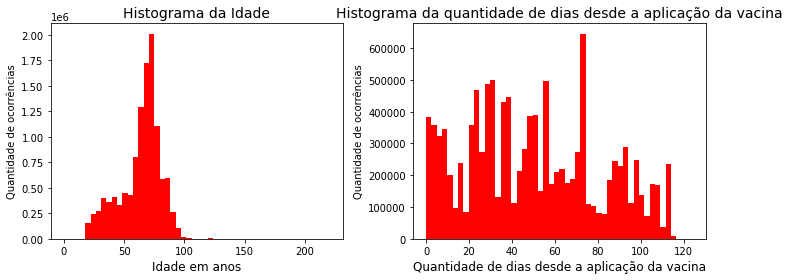

In [220]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# histograma paciente_idade
dados_numer['paciente_idade'].plot(kind="hist", ax=ax[0], color='r', bins=50)
ax[0].set_title('Histograma da Idade', fontsize=14)
ax[0].set_ylabel('Quantidade de ocorrências')
ax[0].set_xlabel('Idade em anos', fontsize = 12)

# # histograma vacina_dias_desde_aplicacao
dados_numer['vacina_dias_desde_aplicacao'].plot(kind="hist", ax=ax[1], color='r', bins=50)
ax[1].set_title('Histograma da quantidade de dias desde a aplicação da vacina', fontsize=14)
ax[1].set_ylabel('Quantidade de ocorrências')
ax[1].set_xlabel('Quantidade de dias desde a aplicação da vacina', fontsize = 12)

fig.tight_layout();

Analisando os histogramas das variáveis numéricas do DataFrame, podemos observar algumas características que já observamos na análise estatística descritiva, além de outras que só é possível observar visualmente. 

*  **paciente_idade:** Podemos perceber que de fato a maioria das pessoas estão entre 50 e 100 anos, como visto na descrição, 25% das pessoas tem menos de 56 anos, e no histograma é possível perceber raríssimos casos maiores que 100 anos, como esperado, possivelmente são outliers.

*  **vacina_dias_desde_aplicacao:** Podemos perceber que o início da vacinação foi mais lento, indicado pela quantidade de dias mais alta, e um aumento a partir do início de março (74 dias), com alguns picos, podendo as baixas representarem fins de semana.

Outra análise gráfica importante de ser feita é por meio do boxplot. Com ele, é possível visualizar o intervalo entre quartis e a presença, ou não, de outliers. Isso porque o boxplot segue a seguinte estrutura: todo ponto em um boxplot representa que há um valor na variável que pode ser considerado, por definição, como um outlier. 

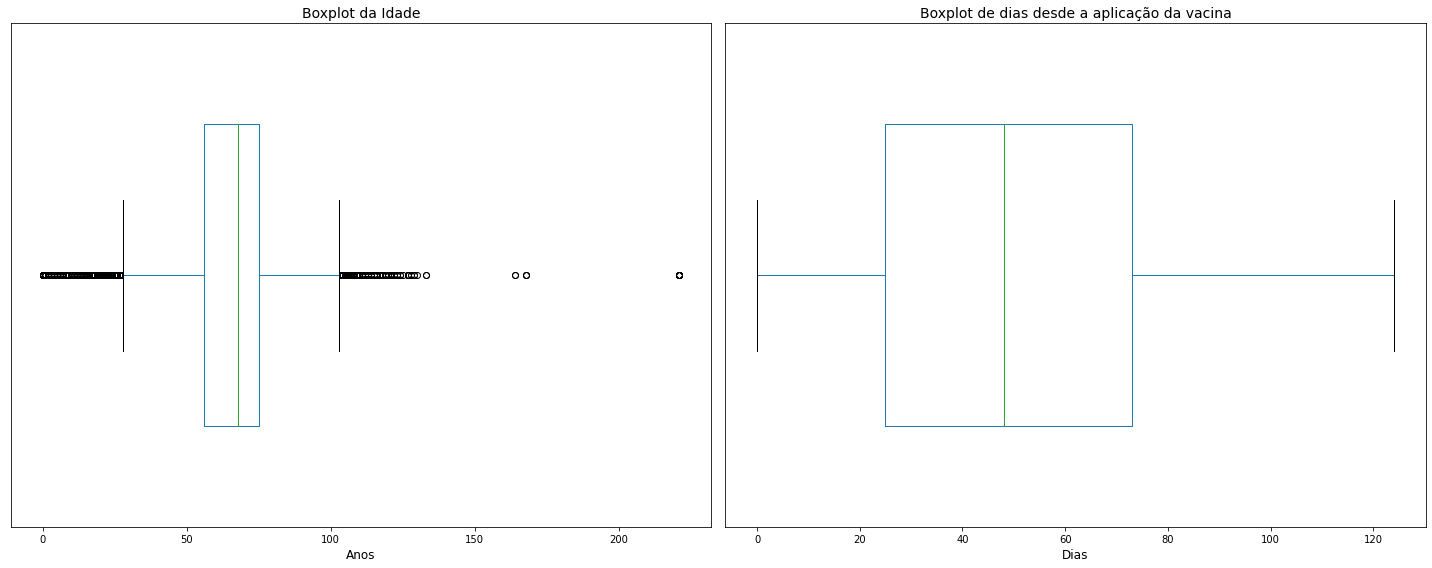

In [227]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

# boxplot paciente_idade
dados_numer.boxplot(['paciente_idade'], ax=ax[0], vert=False, widths=0.6, grid=False)
ax[0].set_yticks([])
ax[0].set_xlabel('Anos', fontsize = 12)
ax[0].set_title('Boxplot da Idade', fontsize=14)

# boxplot paciente_idade
dados_numer.boxplot(['vacina_dias_desde_aplicacao'], ax=ax[1], vert=False, widths=0.6, grid=False)
ax[1].set_yticks([])
ax[1].set_xlabel('Dias', fontsize = 12)
ax[1].set_title('Boxplot de dias desde a aplicação da vacina', fontsize=14)

fig.tight_layout();

,Variável,Limite inferior,Q1,Q2 - Mediana,Q3,Limite superior
0,paciente_idade,28.0,56.0,68.0,75.0,103.0
1,vacina_dias_desde_aplicacao,0.0,25.0,48.0,73.0,124.0


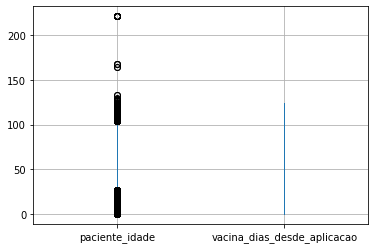

In [234]:
# Exibindo valores dos limites inferiores e superiores de cada variável numérica
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['Variável'] = labels[i]
        dict1['Limite inferior'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['Q1'] = bp['boxes'][i].get_ydata()[1]
        dict1['Q2 - Mediana'] = bp['medians'][i].get_ydata()[1]
        dict1['Q3'] = bp['boxes'][i].get_ydata()[2]
        dict1['Limite superior'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)
    
bp = dados_numer.boxplot(['paciente_idade', 'vacina_dias_desde_aplicacao'], return_type='dict', widths=0)
get_box_plot_data(labels=['paciente_idade', 'vacina_dias_desde_aplicacao'], bp=bp)

**paciente_idade:** Na análise do histograma, sugerimos a presença de outliers e, de acordo com o boxplot, há sim outliers tanto à direita, com pacientes com idade maior que 103 anos, quanto à esquerda, com pacientes com idades menores que 28 anos. Talvez alguns desses outliers superiores sejam verdadeiros, porém, segundo registros, a pessoa mais velha do mundo, chegou até 122 anos de idade. E sobre os outliers inferiores, é possível que alguns deles também sejam verdadeiros, pois profissionais da saúde foram contemplados em um dos grupos prioritários, e existe um número razoável de pessoas, entre 18 e 28, que podem se encaixar nessa categoria.

**vacina_dias_desde_aplicacao:** Podemos confirmar que não há outliers e os dados estão mais inclinados à esquerda (recente).

## Variáveis categóricas

Para as variáves categóricas, antes de mais nada vamos analisar a descrição dos dados.

In [18]:
dados_cat.describe()

,paciente_enumsexobiologico,paciente_racacor_valor,paciente_endereco_nmmunicipio,paciente_endereco_uf,estalecimento_nofantasia,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_descricao_dose,vacina_nome
count,11567409,11567409,11520037,11519982,11567410,11567410,11567410,11492518,11492518,11567410,11567410,11567410
unique,3,6,4976,28,4727,645,1,69,13,5,3,4
top,F,BRANCA,SAO PAULO,SP,UBS ESPIRITO SANTO,SAO PAULO,SP,Outros,Faixa Etária,SINOVAC,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
freq,7112203,5523476,3051892,11171859,138599,3375864,11567410,2609826,7914340,8179329,7658353,8249722


In [25]:
# Observando valores únicos de cada variável, para as variáveis com menos de 100 itens
for var in dados_cat[['paciente_enumsexobiologico', 'paciente_racacor_valor', 'paciente_endereco_uf', 
                      'estabelecimento_uf', 'vacina_grupoatendimento_nome', 'vacina_categoria_nome', 
                      'vacina_fabricante_nome', 'vacina_descricao_dose', 'vacina_nome']]:
    print(f"--> {var}: {dados_cat[var].unique()}")

--> paciente_enumsexobiologico: ['F' 'M' 'I' nan]
--> paciente_racacor_valor: ['BRANCA' 'SEM INFORMACAO' 'AMARELA' 'INDIGENA' 'PARDA' 'PRETA' nan]
--> paciente_endereco_uf: ['SP' 'PB' nan 'XX' 'PR' 'MG' 'RJ' 'SC' 'BA' 'MS' 'PE' 'PA' 'CE' 'MT' 'GO'
 'PI' 'AM' 'ES' 'RS' 'DF' 'SE' 'MA' 'RN' 'AL' 'AC' 'RO' 'TO' 'AP' 'RR']
--> estabelecimento_uf: ['SP']
--> vacina_grupoatendimento_nome: ['Pessoas de 65 a 69 anos' 'Pessoas de 80 anos ou mais' 'Outros'
 'Pessoas de 70 a 74 anos' 'Pessoas de 75 a 79 anos' 'Ensino Básico'
 'Segurança' 'Pessoas de 60 a 64 anos'
 'Pessoas de 60 nos ou mais Institucionalizadas' nan
 'Pessoas com Deficiência Institucionalizadas'
 'Povos indígenas em terras indígenas' 'Quilombola'
 'Pessoas em Situação de Rua' 'Fisioterapeutas'
 'Profissionais de Educação Física' 'Policial Militar'
 'Motorista de Ambulância' 'Auxiliar de Enfermagem' 'Cuidador de Idosos'
 'Técnico de Odontologia' 'Técnico de Enfermagem'
 'Funcionário do Sistema Funerário c/ cadáveres potencialmente c

Vamos analisar melhor a proporção dos valores das variáveis categóricas. Para isso, vamos utilizar gráficos de waffle.

#### Variável paciente_enumsexobiologico

{'F': 7112203, 'M': 4455179, 'I': 27}


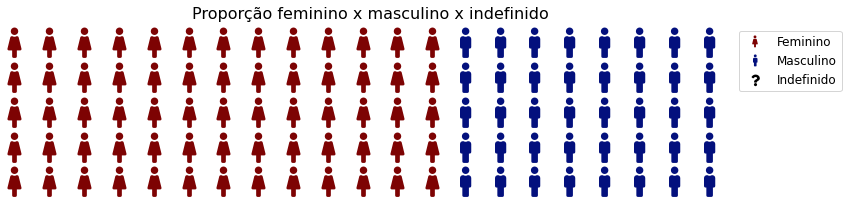

In [44]:
# extrair value counts da variavel
sex = dados_cat['paciente_enumsexobiologico'].value_counts().to_dict()
print(sex)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                colors=("#7D0303","#03107D", "#000000"),
                title={'label': 'Proporção feminino x masculino x indefinido',  'fontsize': 16},
                values=sex, 
                icons=('female','male','question'), 
                icon_size=30, 
                labels=('Feminino','Masculino','Indefinido'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos confirmar que a proporção de mulheres no DataFrame é superior à proporção de homens, e indefinido quase não aparece.

#### Variável paciente_racacor_valor

{'BRANCA': 5523476, 'SEM INFORMACAO': 4136621, 'PARDA': 841995, 'AMARELA': 685160, 'PRETA': 372928, 'INDIGENA': 7229}


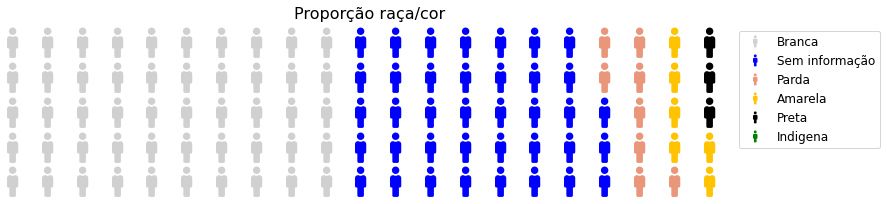

In [50]:
# extrair value counts da variavel
raca = dados_cat['paciente_racacor_valor'].value_counts().to_dict()
print(raca)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                colors=('#D0D0D0', '#0000FF', '#E9967A', '#FFC300', '#000000', '#008000'),
                title={'label': 'Proporção raça/cor',  'fontsize': 16},
                values=raca, 
                icons=('male'), 
                icon_size=30, 
                labels=('Branca','Sem informação','Parda', 'Amarela', 'Preta', 'Indigena'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que quase metade da população vacinada é branca, outra grande parte é sem informação, seguido por uma pequena população parda, depois amarela e por fim, uma proporção bem pequena de preta e quase imperceptível de indígena.

#### Variável estabelecimento_uf

{'SP': 11567410}


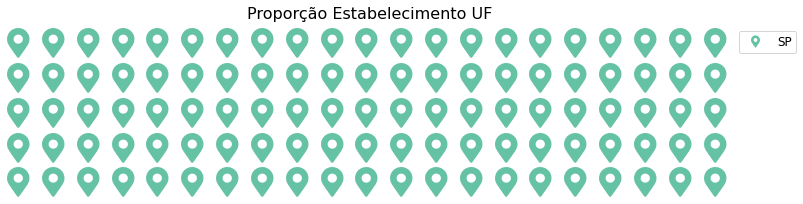

In [61]:
# extrair value counts da variavel
uf = dados_cat['estabelecimento_uf'].value_counts().to_dict()
print(uf)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                title={'label': 'Proporção Estabelecimento UF',  'fontsize': 16},
                values=uf, 
                icons=('map-marker-alt'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que todos estabelecimentos são de São Paulo, o que era o esperado, já que filtramos a priori os dados para este estado.

#### Variável paciente_endereco_uf

{'SP': 11171859, 'MG': 84619, 'BA': 45385, 'PR': 36837, 'RJ': 28946, 'PE': 18879, 'MS': 14064, 'CE': 13166, 'SC': 11744, 'GO': 10206, 'PB': 9840, 'AL': 8261, 'MT': 7018, 'PI': 6988, 'RS': 6949, 'PA': 6002, 'ES': 5619, 'MA': 5411, 'RN': 4948, 'DF': 4650, 'SE': 4146, 'XX': 3493, 'AM': 3296, 'RO': 3152, 'TO': 2368, 'AC': 963, 'RR': 746, 'AP': 427}


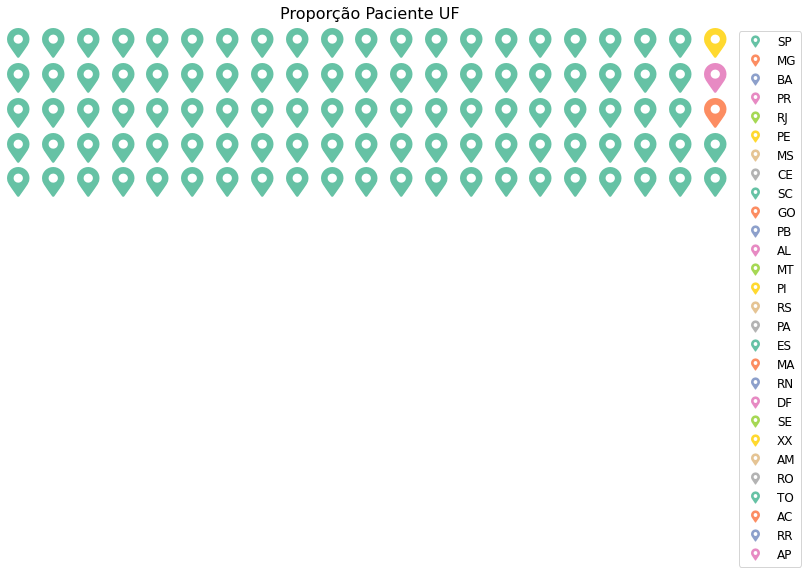

In [59]:
# extrair value counts da variavel
uf = dados_cat['paciente_endereco_uf'].value_counts().to_dict()
print(uf)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                title={'label': 'Proporção Paciente UF',  'fontsize': 16},
                values=uf, 
                icons=('map-marker-alt'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(13,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a grande maioria é composta por habitantes de São Paulo mesmo. Podemos perceber que existe o estado XX que é um valor inválido de estado.

#### Variável vacina_categoria_nome

{'Faixa Etária': 7914340, 'Trabalhadores de Saúde': 2749515, 'Trabalhadores da Educação': 387317, 'Comorbidades': 288389, 'Pessoas de 60 anos ou mais institucionalizadas': 104407, 'Pessoas com Deficiência': 14895, 'Povos e Comunidades Tradicionais': 11460, 'Pessoas em Situação de Rua': 10834, 'Povos Indígenas': 7606, 'Trabalhadores de Transporte': 3367, 'Forças de Segurança e Salvamento': 306, 'Funcionário do Sistema de Privação de Liberdade': 81, 'Trabalhadores Industriais': 1}


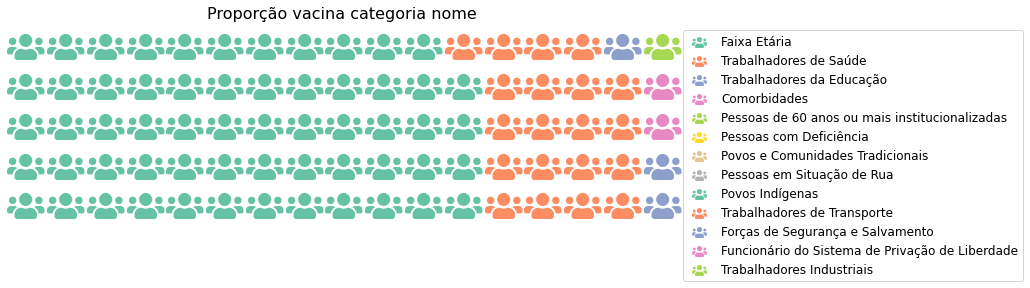

In [67]:
# extrair value counts da variavel
categoria = dados_cat['vacina_categoria_nome'].value_counts().to_dict()
print(categoria)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=17,
                title={'label': 'Proporção vacina categoria nome',  'fontsize': 16},
                values=categoria, 
                icons=('users'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a grande maioria foi vacinada na categória de faixa etária, seguido por trabalhadores de saúde e uma pequena parte de trabalhadores da educação, pessoas com comorbidades, pessoas de 60 anos ou mais institucionalizadas e os outros grupos são bem menos representativos.

#### Variável vacina_fabricante_nome

{'SINOVAC': 8179329, 'ASTRAZENECA/OXFORD': 3136530, 'SERUM INSTITUTE OF INDIA LTD': 170727, 'BIONTECH/FOSUN PHARMA/PFIZER': 80807, 'JANSSEN-CILAG': 17}


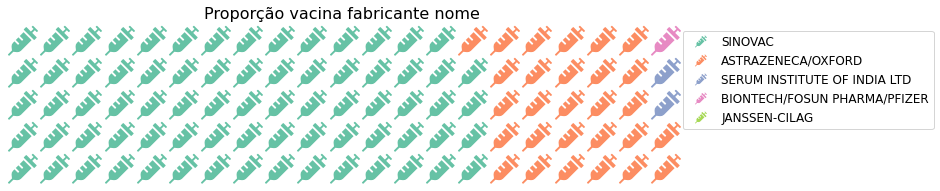

In [74]:
# extrair value counts da variavel
fabricante = dados_cat['vacina_fabricante_nome'].value_counts().to_dict()
print(fabricante)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                title={'label': 'Proporção vacina fabricante nome',  'fontsize': 16},
                values=fabricante, 
                icons=('syringe'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a grande maioria foi vacinada com a vacina da fabricante SINOVAC, seguida da ASTRAZENECA/OXFORD e em pequenas proporções aparecem a da INDIA e a BIONTECH/PFIZER, a JANSSEN é quase insignificante.

#### Variável vacina_nome

{'Covid-19-Coronavac-Sinovac/Butantan': 8249722, 'Vacina Covid-19 - Covishield': 3236864, 'Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer': 80807, 'Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag': 17}


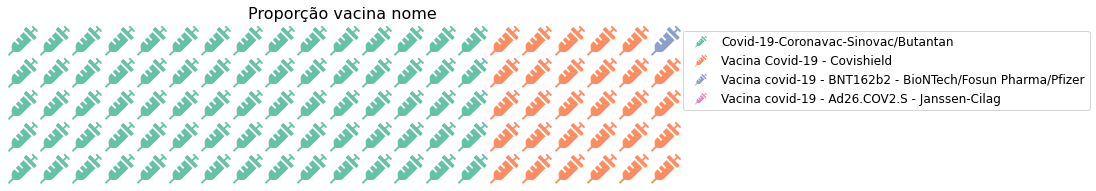

In [73]:
# extrair value counts da variavel
vacina = dados_cat['vacina_nome'].value_counts().to_dict()
print(vacina)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                title={'label': 'Proporção vacina nome',  'fontsize': 16},
                values=vacina, 
                icons=('syringe'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a grande maioria foi vacinada com a vacina CORONAVAC-SINOVAC/BUTANTAN, seguida da COVISHIELD e, por fim, a PFIZER em proporção bem pequena. A JANSSEN é quase insignificante.

#### Variável vacina_descricao_dose

{'\xa0\xa0\xa0\xa01ª\xa0Dose': 7658353, '\xa0\xa0\xa0\xa02ª\xa0Dose': 3909040, '\xa0\xa0\xa0\xa0Dose\xa0': 17}


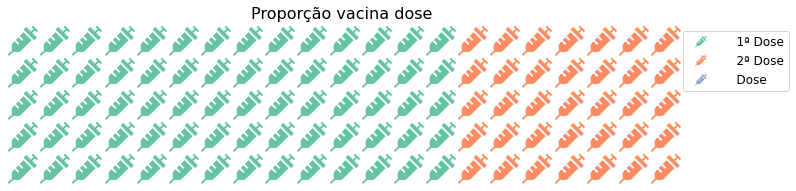

In [75]:
# extrair value counts da variavel
dose = dados_cat['vacina_descricao_dose'].value_counts().to_dict()
print(dose)
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=21,
                title={'label': 'Proporção vacina dose',  'fontsize': 16},
                values=dose, 
                icons=('syringe'), 
                icon_size=30, 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(12,6))
fig.set_tight_layout(False)
plt.show();

De acordo com o gráfico de waffle podemos perceber que a grande maioria da vacinação foi aplicação da primeira dose, mas também percebemos que houve uma grande quantidade de aplicações da segunda dose (aproximadamente metade das pessoas que tomaram a primeira dose, já tomaram a segunda também. 

In [47]:
dados_cat[(dados_cat['vacina_descricao_dose']=='\xa0\xa0\xa0\xa0Dose\xa0')&(dados_cat['vacina_fabricante_nome']!='JANSSEN-CILAG')]

,paciente_enumsexobiologico,paciente_racacor_valor,paciente_endereco_nmmunicipio,paciente_endereco_uf,estalecimento_nofantasia,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_descricao_dose,vacina_nome


Também podemos perceber que a categoria "Dose" está associada à vacina JANSSEN, que exige apenas uma aplicação.

Para as outras variáveis categóricas, como existem muitos valores para elas, vamos exibir um gráfico de barras, selecionando apenas os top 30 elementos.

#### Variável paciente_endereco_nmmunicipio

<AxesSubplot:title={'center':'Paciente endereço município - TOP 30'}>

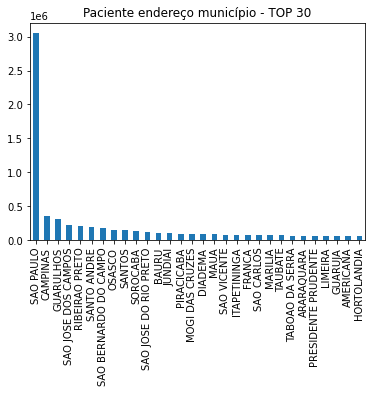

In [86]:
dados_cat.paciente_endereco_nmmunicipio.value_counts().sort_values(ascending=False)[:30].plot(kind='bar', title='Paciente endereço município - TOP 30')

Podemos perceber que pessoas da cidade de São Paulo foram de longe as mais vacinada, seguida de Campinas e Guarulhos. Também podemos perceber que não há tanta diferença nas próximas cidades e São Carlos aparece em 21ª posição.

#### Variável estabelecimento_municipio_nome

<AxesSubplot:title={'center':'Estabelecimento endereço município - TOP 30'}>

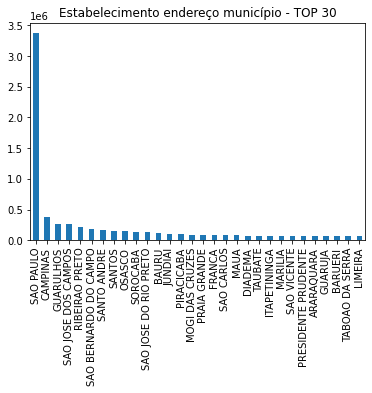

In [87]:
dados_cat.estabelecimento_municipio_nome.value_counts().sort_values(ascending=False)[:30].plot(kind='bar', title='Estabelecimento endereço município - TOP 30')

Podemos perceber que a distribuição das cidades dos estabelecimentos é bem parecida com o dos próprios pacientes, o que leva a crer que de fato a maioria das pessoas estão sendo vacinadas nas suas próprias cidades. Temos a cidade de São Paulo de longe a mais vacinada, seguida de Campinas e Guarulhos, e São Carlos aparece em 18ª posição.

#### Variável estalecimento_nofantasia

<AxesSubplot:title={'center':'Estabelecimento nome - TOP 30'}>

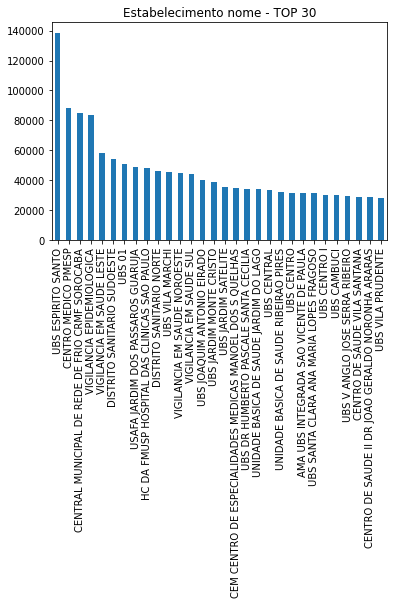

In [89]:
dados_cat.estalecimento_nofantasia.value_counts().sort_values(ascending=False)[:30].plot(kind='bar', title='Estabelecimento nome - TOP 30')

Podemos perceber a presença de diversas UBS, hospitais e centro médico.

#### Variável vacina_grupoatendimento_nome

<AxesSubplot:title={'center':'Vacina grupo atendimento - TOP 30'}>

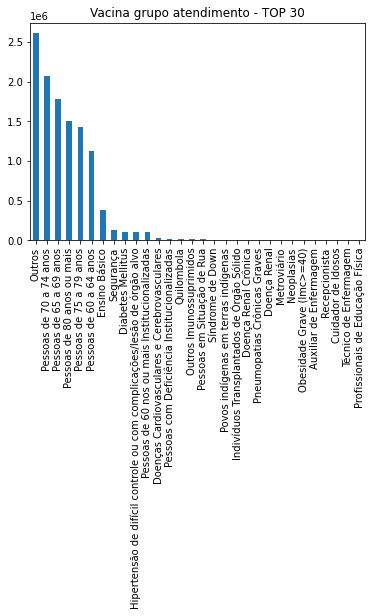

In [90]:
dados_cat.vacina_grupoatendimento_nome.value_counts().sort_values(ascending=False)[:30].plot(kind='bar', title='Vacina grupo atendimento - TOP 30')

Podemos perceber que grande parte está no grupo "outros", seguido de vários grupos de faixas etárias, sendo na ordem: de 70 a 74 anos, de 65 a 69 anos, de 80 anos ou mais, de 75 a 79 anos, de 60 a 64 anos. Em seguida, os grupos são Ensino Básico, Segurança, Diabetes Mellitus, Hipertensão, Pessoas de 60 anos ou mais institucionalizadas e outros grupos aparecem com proporções bem pequenas.

## Tratamento dos dados - Valores inválidos, outliers e dados faltantes

Há apenas 17 pacientes associados à vacina Janssen, sabemos que não é um valor inválido. -- DUVIDA: DEVEMOS MANTER ISSO OU APAGAR?

### paciente_idade

Como vimos na análise, percebemos outliers tanto à direita, com pacientes com idade maior que 103 anos, quanto à esquerda, com pacientes com idades menores que 28 anos. Seria necessário uma conversa com especialistas para garantir que são valores inválidos de fato, como não temos esse contato, vamos nos restringir às regras de vacinação, que são para pessoas maiores de 18 anos e colocaremos como limitante superior o registro de pessoa mais velho do mundo, que é 122 anos.

In [16]:
print(f'Vamos eliminar {len(df) - len(df[(df.paciente_idade>=18)&(df.paciente_idade<=122)])} pessoas.')

Vamos eliminar 2096 pessoas.


In [17]:
df = df[(df.paciente_idade>=18)&(df.paciente_idade<=122)]

In [18]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.paciente_idade.isnull().sum()} valores faltantes para idade.')

Existem 0 valores faltantes para idade.


### vacina_dataaplicacao / vacina_dias_desde_aplicacao

Não há presença de outliers nem valores inválidos.

In [19]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.vacina_dataaplicacao.isnull().sum()} valores faltantes para data de aplicação da vacina/dias desde a aplicação.')

Existem 0 valores faltantes para data de aplicação da vacina/dias desde a aplicação.


### paciente_enumsexobiologico -- DUVIDA: SERÁ QUE DEVERÍAMOS TIRAR OS 27 VALORES INDEFINIDOS???

In [21]:
df['paciente_enumsexobiologico'].value_counts() # DUVIDA: SERÁ QUE DEVERÍAMOS TIRAR ESSES 27 VALORES INDEFINIDOS???

F    7110898
M    4454389
I         27
Name: paciente_enumsexobiologico, dtype: int64

In [22]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.paciente_enumsexobiologico.isnull().sum()} valores faltantes para o sexo biológico.')

Existem 0 valores faltantes para o sexo biológico.


### paciente_racacor_valor

Não há presença de valores inválidos.

In [24]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.paciente_racacor_valor.isnull().sum()} valores faltantes para o raça/cor.')

Existem 0 valores faltantes para o raça/cor.


### estalecimento_nofantasia

Não há presença de valores inválidos.

In [29]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.estalecimento_nofantasia.isnull().sum()} valores faltantes para o nome do estabelecimento.')

Existem 0 valores faltantes para o nome do estabelecimento.


### estabelecimento_municipio_nome

Não há presença de valores inválidos.

In [30]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.estabelecimento_municipio_nome.isnull().sum()} valores faltantes para o raça/cor.')

Existem 0 valores faltantes para o raça/cor.


### estabelecimento_uf

Não há presença de valores inválidos.

In [33]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.estabelecimento_uf.isnull().sum()} valores faltantes para o estado do estabelecimento.')

Existem 0 valores faltantes para o estado do estabelecimento.


### vacina_fabricante_nome

Não há presença de valores inválidos.

In [48]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.vacina_fabricante_nome.isnull().sum()} valores faltantes para a fabricante da vacina.')

Existem 0 valores faltantes para a fabricante da vacina.


### vacina_descricao_dose

Não há presença de valores inválidos.

In [49]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.vacina_descricao_dose.isnull().sum()} valores faltantes para a descrição da dose.')

Existem 0 valores faltantes para a descrição da dose.


### vacina_nome

Não há presença de valores inválidos.

In [52]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.vacina_nome.isnull().sum()} valores faltantes para o nome da vacina.')

Existem 0 valores faltantes para o nome da vacina.


### paciente_endereco_nmmunicipio

Não há presença de valores inválidos.

In [96]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.paciente_endereco_nmmunicipio.isnull().sum()} valores faltantes para o município do paciente. Isso representa {df.paciente_endereco_nmmunicipio.isnull().sum()*100/df.paciente_endereco_nmmunicipio.count():.2f}% dos dados.')

Existem 47352 valores faltantes para o município do paciente. Isso representa 0.41% dos dados.


### paciente_endereco_uf

Não há presença de valores inválidos.

In [82]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.paciente_endereco_uf.isnull().sum()} valores faltantes para a UF do paciente. Isso representa {df.paciente_endereco_uf.isnull().sum()*100/df.paciente_endereco_uf.count():.2f}% dos dados.')

Existem 47407 valores faltantes para a UF do paciente. Isso representa 0.41% dos dados.


#### Tratando o endereço do paciente

In [157]:
# Convertendo todos os enderecos de paciente para maiusculo
df.paciente_endereco_nmmunicipio = df.paciente_endereco_nmmunicipio.str.upper()
df.paciente_endereco_uf = df.paciente_endereco_uf.str.upper()

In [158]:
print(f'Há uma intersecção de {df[(df.paciente_endereco_uf.isnull())&(df.paciente_endereco_nmmunicipio.isnull())].shape[0]} desses valores com uf e municipio do paciente nulos, o que corresponde a {df[(df.paciente_endereco_uf.isnull())&(df.paciente_endereco_nmmunicipio.isnull())].shape[0]*100/df.paciente_endereco_uf.isnull().sum():.2f}% dos dados nulos dessas categorias.')


Há uma intersecção de 47348 desses valores com uf e municipio do paciente nulos, o que corresponde a 99.93% dos dados nulos dessas categorias.


## DUVIDA ^ : OQ FAZER COM ESSES 99%? APAGAR OU MANTER?

Podemos preencher o estado das cidades que possuem algum paciente com ambas as informações.

In [161]:
list_cidades_uf_null = list(df[(df.paciente_endereco_uf.isnull())&(~df.paciente_endereco_nmmunicipio.isnull())].paciente_endereco_nmmunicipio.unique())
for cidade in list_cidades_uf_null:
    value_counts_estado = df[df.paciente_endereco_nmmunicipio==cidade].paciente_endereco_uf.value_counts()
    if len(value_counts_estado) > 0:
        estado = value_counts_estado.index[0]
        df.loc[(df['paciente_endereco_nmmunicipio'] == cidade)&(df['paciente_endereco_uf'].isnull()), 'paciente_endereco_uf'] = estado

In [162]:
list(df[(df.paciente_endereco_uf.isnull())&(~df.paciente_endereco_nmmunicipio.isnull())].paciente_endereco_nmmunicipio.unique())

['PARAGUAI',
 'QUEBEC',
 'SUZANO SP',
 'JOÃO CAIAFA',
 'SANTA ELENA',
 'CIUDAD DEL ESTE',
 'CARVILLINO',
 'MAUA - SP',
 'CAMPOS DO JORDAO - SP',
 'TATUI - SP',
 'GILBERTO MELLO FREITAS',
 'JOSE BONIFACIO - SP',
 'IGARACU DO TIET',
 'ROMA',
 'HGYKIU',
 'PRESIDENTE PRUDENTE - SP',
 'BEIRA']

## DUVIDA ^ : OQ FAZER COM ESSES QUE FALTARAM? 

### vacina_grupoatendimento_nome -- DUVIDA: OQ FAZER COM OS VALORES FALTANTES? APAGAR OU PREENCHER COM ALGO?

Não há presença de valores inválidos.

In [163]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.vacina_grupoatendimento_nome.isnull().sum()} valores faltantes para o grupo de atendimento. Isso representa {df.vacina_grupoatendimento_nome.isnull().sum()*100/df.vacina_grupoatendimento_nome.count():.2f}% dos dados.')

Existem 74870 valores faltantes para o grupo de atendimento. Isso representa 0.65% dos dados.


### vacina_categoria_nome -- DUVIDA: OQ FAZER COM OS VALORES FALTANTES? APAGAR OU PREENCHER COM ALGO?

Não há presença de valores inválidos.

In [164]:
# Confirmando quantidade de valores ausentes
print(f'Existem {df.vacina_categoria_nome.isnull().sum()} valores faltantes para o nome da categoria. Isso representa {df.vacina_categoria_nome.isnull().sum()*100/df.vacina_categoria_nome.count():.2f}% dos dados.')

Existem 74870 valores faltantes para o nome da categoria. Isso representa 0.65% dos dados.


In [165]:
print(f'Há uma intersecção de {df[(df.vacina_grupoatendimento_nome.isnull())&(df.vacina_categoria_nome.isnull())].shape[0]} pacientes com grupo de atendimento e nome de categoria nulos.')

Há uma intersecção de 74870 pacientes com grupo de atendimento e nome de categoria nulos.


Portanto, 100% dos casos.

## Análise conjunta 

### Análise de correlação -- TODO: existe algo para ver correlação de variável categórica?

Quando dizemos que duas variáveis são correlacionadas entre si, queremos dizer que ambas possuem uma relação. No caso, essa relação pode ser positiva ou negativa. Em uma correlação positiva temos que quando o valor de uma variável aumenta, o valor de uma outra variável também aumenta. Na correlação negativa temos que quando o valor de uma variável aumenta, o valor de uma outra variável diminui. O valor do índice de correlação vai de -1 até 1, onde -1 a correlação entre as variáveis é perfeitamente negativa, e o valor 1 indica que as variáveis são correlacionadas de forma perfeita e positiva. Além disso, correlações que apresentam valor menor que 0.39, ou -0.39, nos diz que as variáveis são correlacionadas de forma fraca. 

Text(0.5, 1.0, 'Correlação das variáveis')

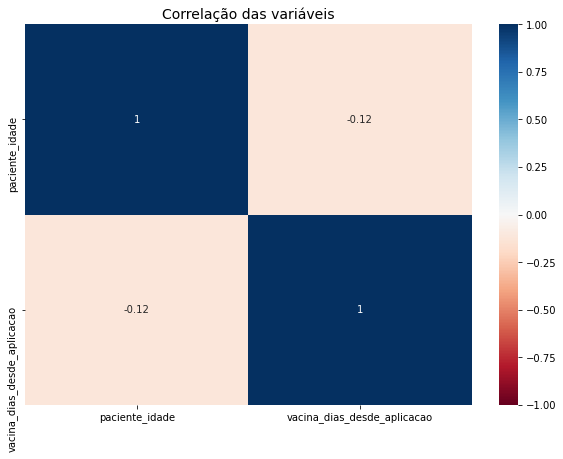

In [172]:
 # heatmap (mapa de calor)
fig, ax = plt.subplots(figsize=(10,7))
corr = df.corr().round(2)
sns.heatmap(corr, cmap='RdBu', linecolor='white', annot=True, ax=ax, vmin=-1.00, vmax= 1.00)
ax.set_title('Correlação das variáveis', fontsize=14)

In [173]:
#ToDo